In [1]:
from models import RedshiftSpace
import models as md
import pickle
import matplotlib.pyplot as plt
import numpy as np
import importlib
import seaborn as sns
from CentralStreamingModel.utils import plot_tools as pt
sns.set_context('talk')
import time

In [2]:
n_boxes = range(1,15)
boxsize = 2000
snapshot = 20

rs = []
for i, box in enumerate(n_boxes):
    rs.append(RedshiftSpace(box, 2000, 20))

In [3]:
importlib.reload(md)

<module 'models' from '/home/c-cuesta/CentralStreamingModel/comparisons/models.py'>

In [ ]:
t1 = time.time()
mean_rs = md.MeanRedshiftSpace( boxsize, snapshot, rs)
print(f'It took {time.time() - t1} seconds.')

Initiating Streaming


In [ ]:
s_c = rs[0].measured.s_c


In [ ]:
pt.plot_attribute_residual( mean_rs, ['streaming'],
                    'monopole',  r'$s^2\xi_0$ (s)', 
                           r'$\frac{\xi_{0,model} - \xi_{0, measured}}{\sigma_{0, measured}}$')

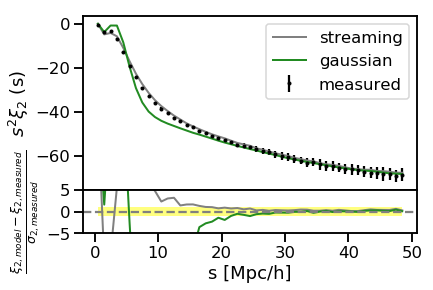

In [7]:
pt.plot_attribute_residual(mean_rs, ['streaming', 'gaussian'],
                    'quadrupole', r'$s^2\xi_2$ (s)',
        r'$\frac{\xi_{2,model} - \xi_{2, measured}}{\sigma_{2, measured}}$')

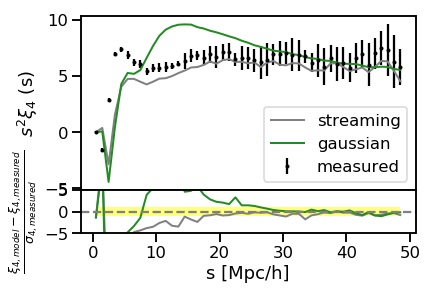

In [8]:
pt.plot_attribute_residual( mean_rs, ['streaming', 'gaussian'],
                    'hexadecapole', r'$s^2\xi_4$ (s)',
        r'$\frac{\xi_{4,model} - \xi_{4, measured}}{\sigma_{4, measured}}$')


In [12]:
mean_rs.skewt_simps = md.Skewt(mean_rs.per_box_list[0].measured.r,
                            mean_rs.per_box_list[0].measured.v_r, mean_rs.per_box_list[0].measured.v_t,
                             mean_rs.measured.jointpdf_rt.mean, mean_rs.mean_tpcf_dict, truncate = 20,
                            integration = 'simpsons')


Found popt
Computing integral
Finished streaming integral


In [ ]:
mean_rs.skewt_norm20 = md.Skewt(mean_rs.per_box_list[0].measured.r,
                            mean_rs.per_box_list[0].measured.v_r, mean_rs.per_box_list[0].measured.v_t,
                             mean_rs.measured.jointpdf_rt.mean, mean_rs.mean_tpcf_dict,
                            truncate = 20., integration = 'quad_norm', popt = mean_rs.skewt_simps.popt)

Found popt
Computing integral


In [ ]:
mean_rs.skewt_norm15 = md.Skewt(mean_rs.per_box_list[0].measured.r,
                            mean_rs.per_box_list[0].measured.v_r, mean_rs.per_box_list[0].measured.v_t,
                             mean_rs.measured.jointpdf_rt.mean, mean_rs.mean_tpcf_dict,
                            truncate = 15., integration = 'quad_norm',popt = mean_rs.skewt_simps.popt)

In [ ]:
mean_rs.skewt_norm17 = md.Skewt(mean_rs.per_box_list[0].measured.r,
                            mean_rs.per_box_list[0].measured.v_r, mean_rs.per_box_list[0].measured.v_t,
                             mean_rs.measured.jointpdf_rt.mean, mean_rs.mean_tpcf_dict,
                            truncate = 17., integration = 'quad_norm',popt = mean_rs.skewt_simps.popt)

In [ ]:
pt.plot_attribute_residual( mean_rs, ['streaming','skewt_simps', 'skewt_norm20', 'skewt_norm15', 'skewt_norm17'],
                    'monopole',  r'$s^2\xi_0$ (s)', 
                r'$\frac{\xi_{0,model} - \xi_{0, measured}}{\sigma_{0, measured}}$')

In [ ]:
pt.plot_attribute_residual( mean_rs, ['streaming','skewt_simps', 'skewt_norm20', 'skewt_norm15', 'skewt_norm17'],
                    'quadrupole',  r'$s^2\xi_0$ (s)', 
                r'$\frac{\xi_{2,model} - \xi_{2, measured}}{\sigma_{2, measured}}$')

In [ ]:
pt.plot_attribute_residual( mean_rs, ['streaming','skewt_simps', 'skewt_norm20', 'skewt_norm15', 'skewt_norm17'],
                    'hexadecapole',  r'$s^2\xi_0$ (s)', 
                r'$\frac{\xi_{4,model} - \xi_{4, measured}}{\sigma_{4, measured}}$')